In [2]:
import numpy as np
import torch
import mogptk

torch.manual_seed(1);

In [4]:
# create time array
n_points = 100
t = np.linspace(0.0, 6.0, n_points)

# channel 1
y1 = np.sin(6.0*t) + 0.2*np.random.normal(size=len(t))

# channel 2, phased version
y2 = np.sin(6.0*t + 2.0) + 0.2*np.random.normal(size=len(t))

# channel 3, added sinosoidal
y3 = np.sin(6.0*t) - np.sin(4.0*t) + 0.2*np.random.normal(size=len(t))

# channel 4, delayed and amplified
y4 = 3.0*np.sin(6.0 * (t-2.0)) + 0.3*np.random.normal(size=len(t))

In [19]:
# create dataset
dataset = mogptk.DataSet(
    mogptk.Data(t, y1, name='First channel'),
    mogptk.Data(t, y2, name='Second channel'),
    mogptk.Data(t, y3, name='Third channel'),
    mogptk.Data(t, y4, name='Fourth channel')
)
dataset.transform(mogptk.TransformNormalize)

In [20]:
# remove 40% randomly
for data in dataset:
    data.remove_randomly(pct=0.4)

# remove second half of the first channel
dataset[0].remove_range(start=2.0)

In [21]:
dataset

           X         Y
0   0.000000 -0.231127
1   0.060606  0.284654
2   0.121212  0.751005
3   0.181818  1.319076
4   0.242424  0.959533
..       ...       ...
95  5.757576 -0.021007
96  5.818182 -0.641721
97  5.878788 -0.806967
98  5.939394 -0.973481
99  6.000000 -0.722280

[100 rows x 2 columns]
           X         Y
0   0.000000  0.977949
1   0.060606  0.477552
2   0.121212  0.643914
3   0.181818 -0.049394
4   0.242424 -0.519433
..       ...       ...
95  5.757576 -0.807911
96  5.818182 -0.327518
97  5.878788 -0.578435
98  5.939394 -0.114735
99  6.000000  0.443790

[100 rows x 2 columns]
           X         Y
0   0.000000 -0.131949
1   0.060606 -0.015072
2   0.121212  0.158443
3   0.181818  0.236777
4   0.242424  0.106879
..       ...       ...
95  5.757576  0.592834
96  5.818182  0.297107
97  5.878788  0.575051
98  5.939394  0.018550
99  6.000000  0.002345

[100 rows x 2 columns]
           X         Y
0   0.000000  2.230077
1   0.060606  2.451326
2   0.121212  2.972578
3   0.18

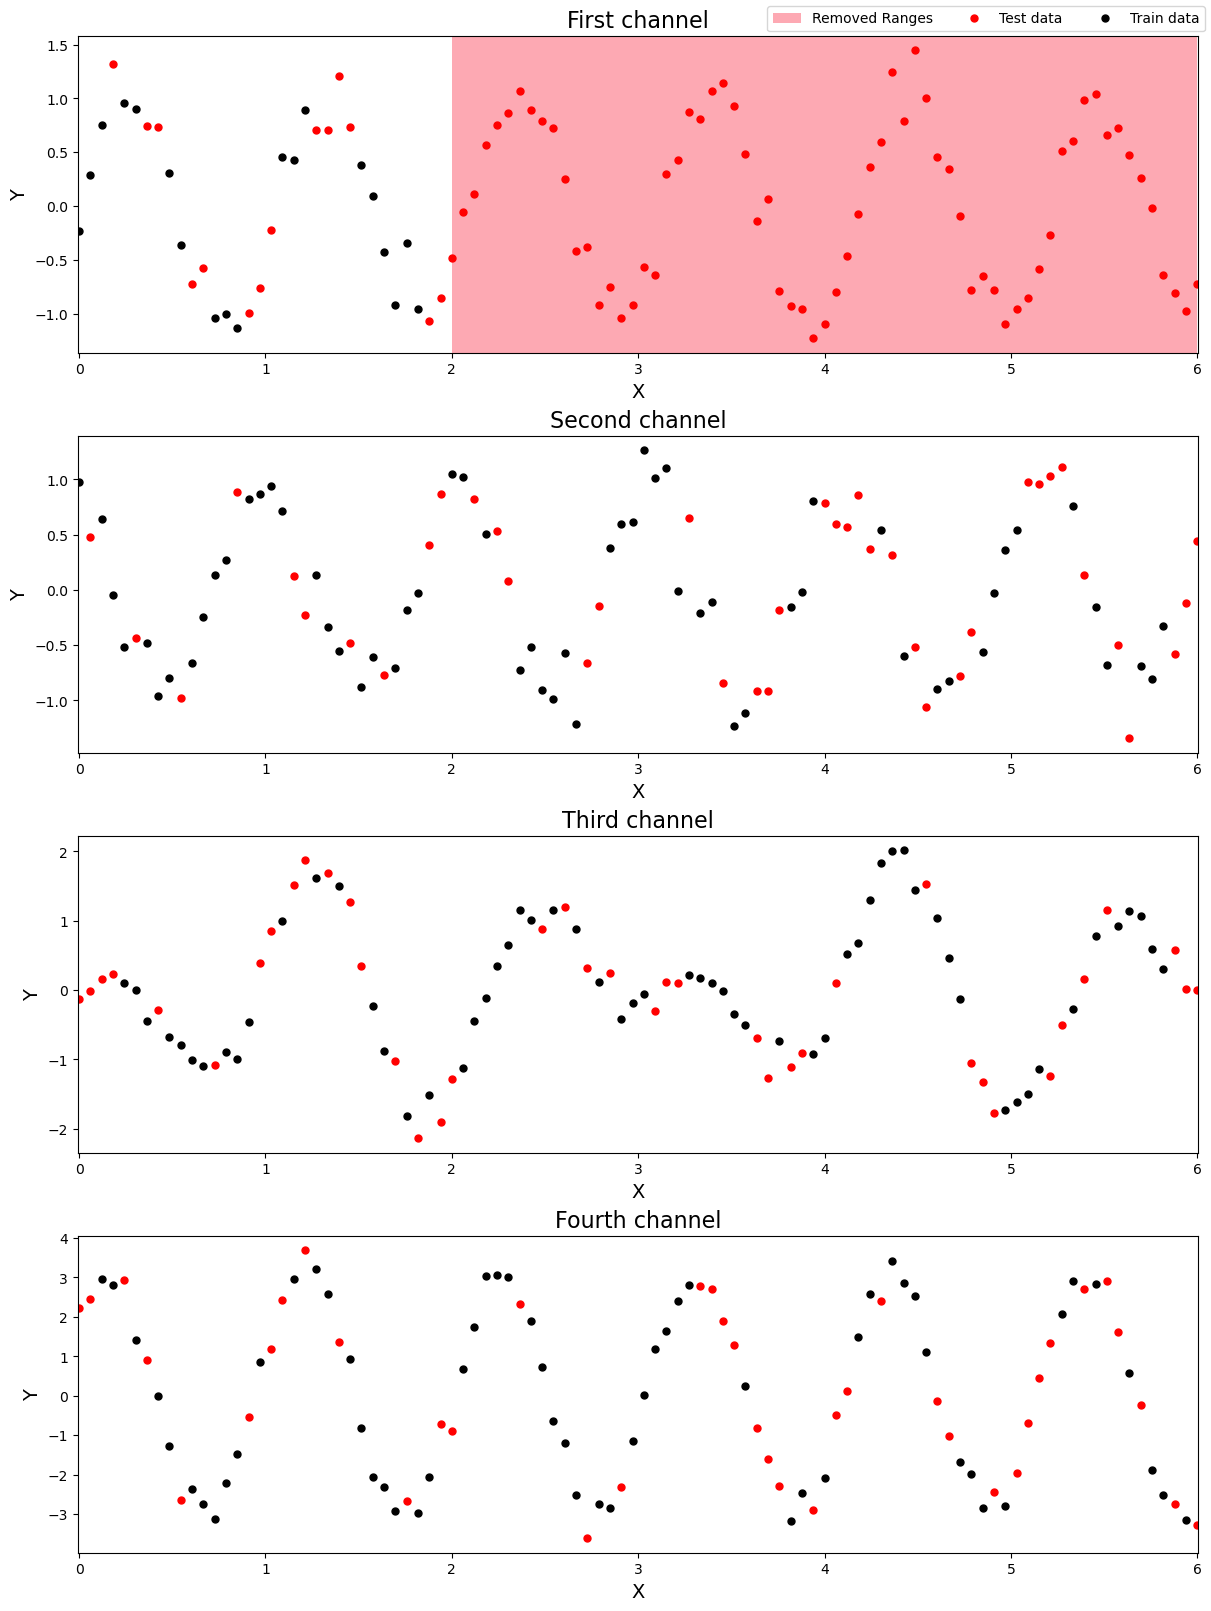

In [7]:
dataset.plot();


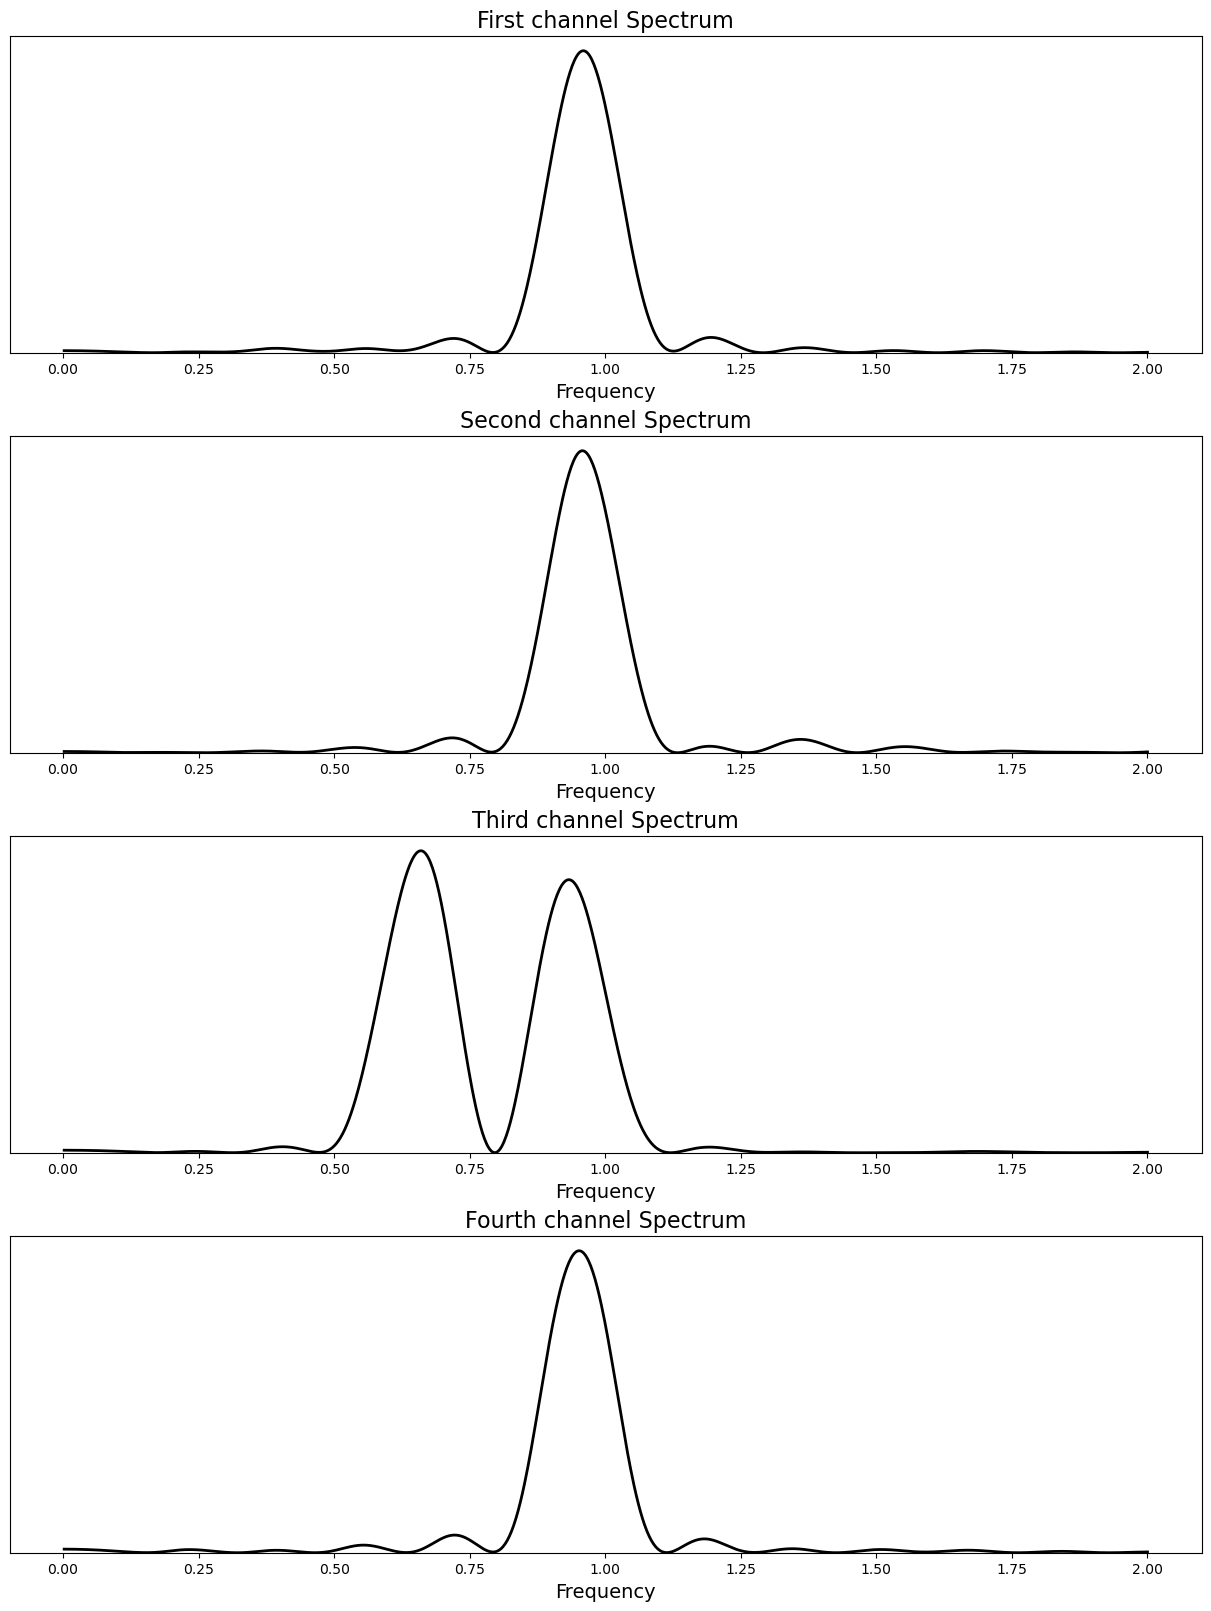

In [8]:
dataset.plot_spectrum(maxfreq=2);


In [9]:
# create model, uncomment for different kernels 
model = mogptk.MOSM(dataset, Q=2)
# model = mogptk.CSM(dataset, Q=2)
# model = mogptk.SM_LMC(dataset, Q=2)
# model = mogptk.CONV(dataset, Q=2)

# initialize parameters of kernel using LombScargle
model.init_parameters(method='LS', iters=500)

In [10]:
model.print_parameters()

Name,Range,Value
MultiOutputSpectralMixtureKernel.weight,"[1e-08, ∞)",[[ 9.61673881 5.51927696] [ 9.36786868 2.96958864] [10.12346413 9.84287617] [31.81886532 9.95707259]]
MultiOutputSpectralMixtureKernel.mean,"[1e-08, 8.250000000000007]",[[[0.95462046] [2.22689769]] [[0.96039604] [3.58745875]] [[0.92986799] [0.65511551]] [[0.95214521] [1.20132013]]]
MultiOutputSpectralMixtureKernel.variance,"[1e-08, ∞)",[[[0.03572758] [0.02330767]] [[0.0042223 ] [0.00777538]] [[0.00391 ] [0.00403811]] [[0.00480085] [0.00187438]]]
MultiOutputSpectralMixtureKernel.delay,"(-∞, ∞)",[[[0.] [0.]] [[0.] [0.]] [[0.] [0.]] [[0.] [0.]]]
MultiOutputSpectralMixtureKernel.phase,"(-∞, ∞)",[[0. 0.] [0. 0.] [0. 0.] [0. 0.]]
GaussianLikelihood.scale,"[1e-08, ∞)",[0.7023477 0.69327403 0.97934368 2.26605298]


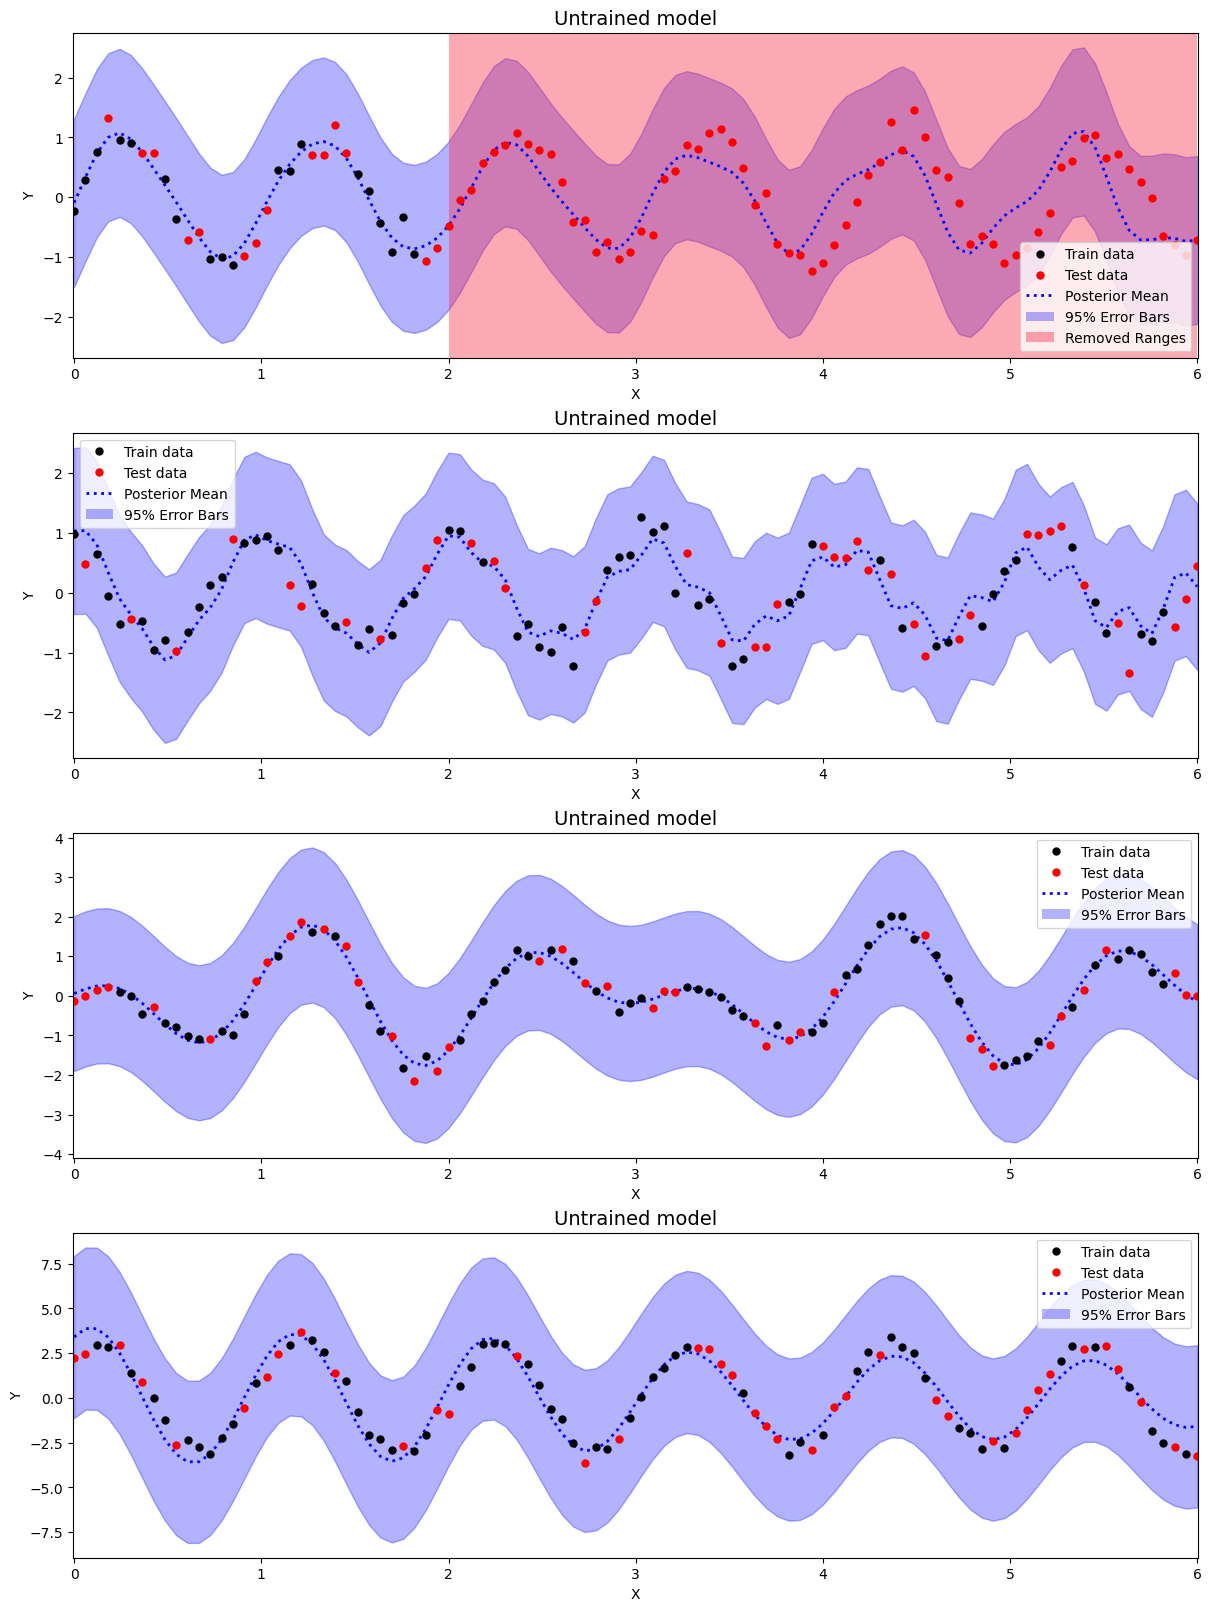

In [11]:
# plot the prediction with the untrained model
model.plot_prediction(title='Untrained model');

Starting optimization using Adam
‣ Model: Exact
  ‣ Kernel: MultiOutputSpectralMixtureKernel
  ‣ Likelihood: GaussianLikelihood
‣ Channels: 4
‣ Parameters: 44
‣ Training points: 199
‣ Iterations: 1000
     0/1000   0:00:00  loss=     260.601  error=    0.359913 (warmup)
   842/1000   0:00:10  loss=     20.5228  error=    0.240564
  1000/1000   0:00:11  loss=     30.8434  error=     0.21165
Optimization finished in 11.678 seconds


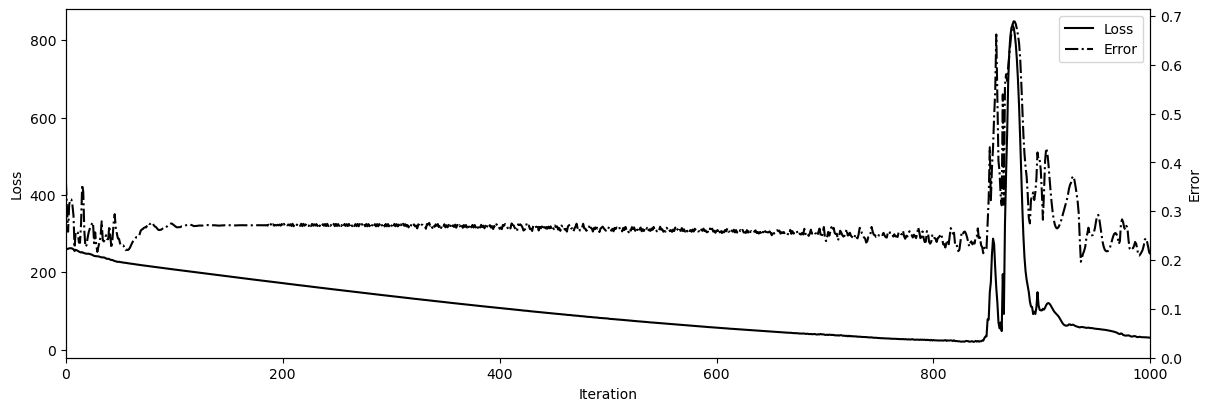

In [12]:
model.train(method='Adam', lr=0.02, iters=1000, plot=True, error='MAE', verbose=True);

In [13]:
model.print_parameters()


Name,Range,Value
MultiOutputSpectralMixtureKernel.weight,"[1e-08, ∞)",[[ 2.68092317 1.27627105] [ 5.30718128 0.58517679] [ 5.87341771 3.13393501] [17.01728484 2.34567406]]
MultiOutputSpectralMixtureKernel.mean,"[1e-08, 8.250000000000007]",[[[0.95424289] [0.95121606]] [[0.95103195] [3.3225048 ]] [[0.94920157] [0.63353159]] [[0.95124394] [0.69197753]]]
MultiOutputSpectralMixtureKernel.variance,"[1e-08, ∞)",[[[0.00723924] [0.00468013]] [[0.00276142] [0.00173589]] [[0.00319874] [0.00106091]] [[0.00252373] [0.00049808]]]
MultiOutputSpectralMixtureKernel.delay,"(-∞, ∞)",[[[-1.08766987e-001] [ 9.73225530e-002]] [[ 4.22439652e-001] [ 3.91218287e-247]] [[-7.58169136e-001] [-4.03213561e-001]] [[ 3.12164655e-001] [ 4.12227693e-001]]]
MultiOutputSpectralMixtureKernel.phase,"(-∞, ∞)",[[ 6.83730155e-001 -8.19224223e-002] [ 4.12685977e-001 1.20304663e-247] [-7.56675622e-001 -4.02462105e-001] [ 2.82731116e-001 6.05528791e-001]]
GaussianLikelihood.scale,"[1e-08, ∞)",[0.19646077 0.23823659 0.246457 0.5519348 ]


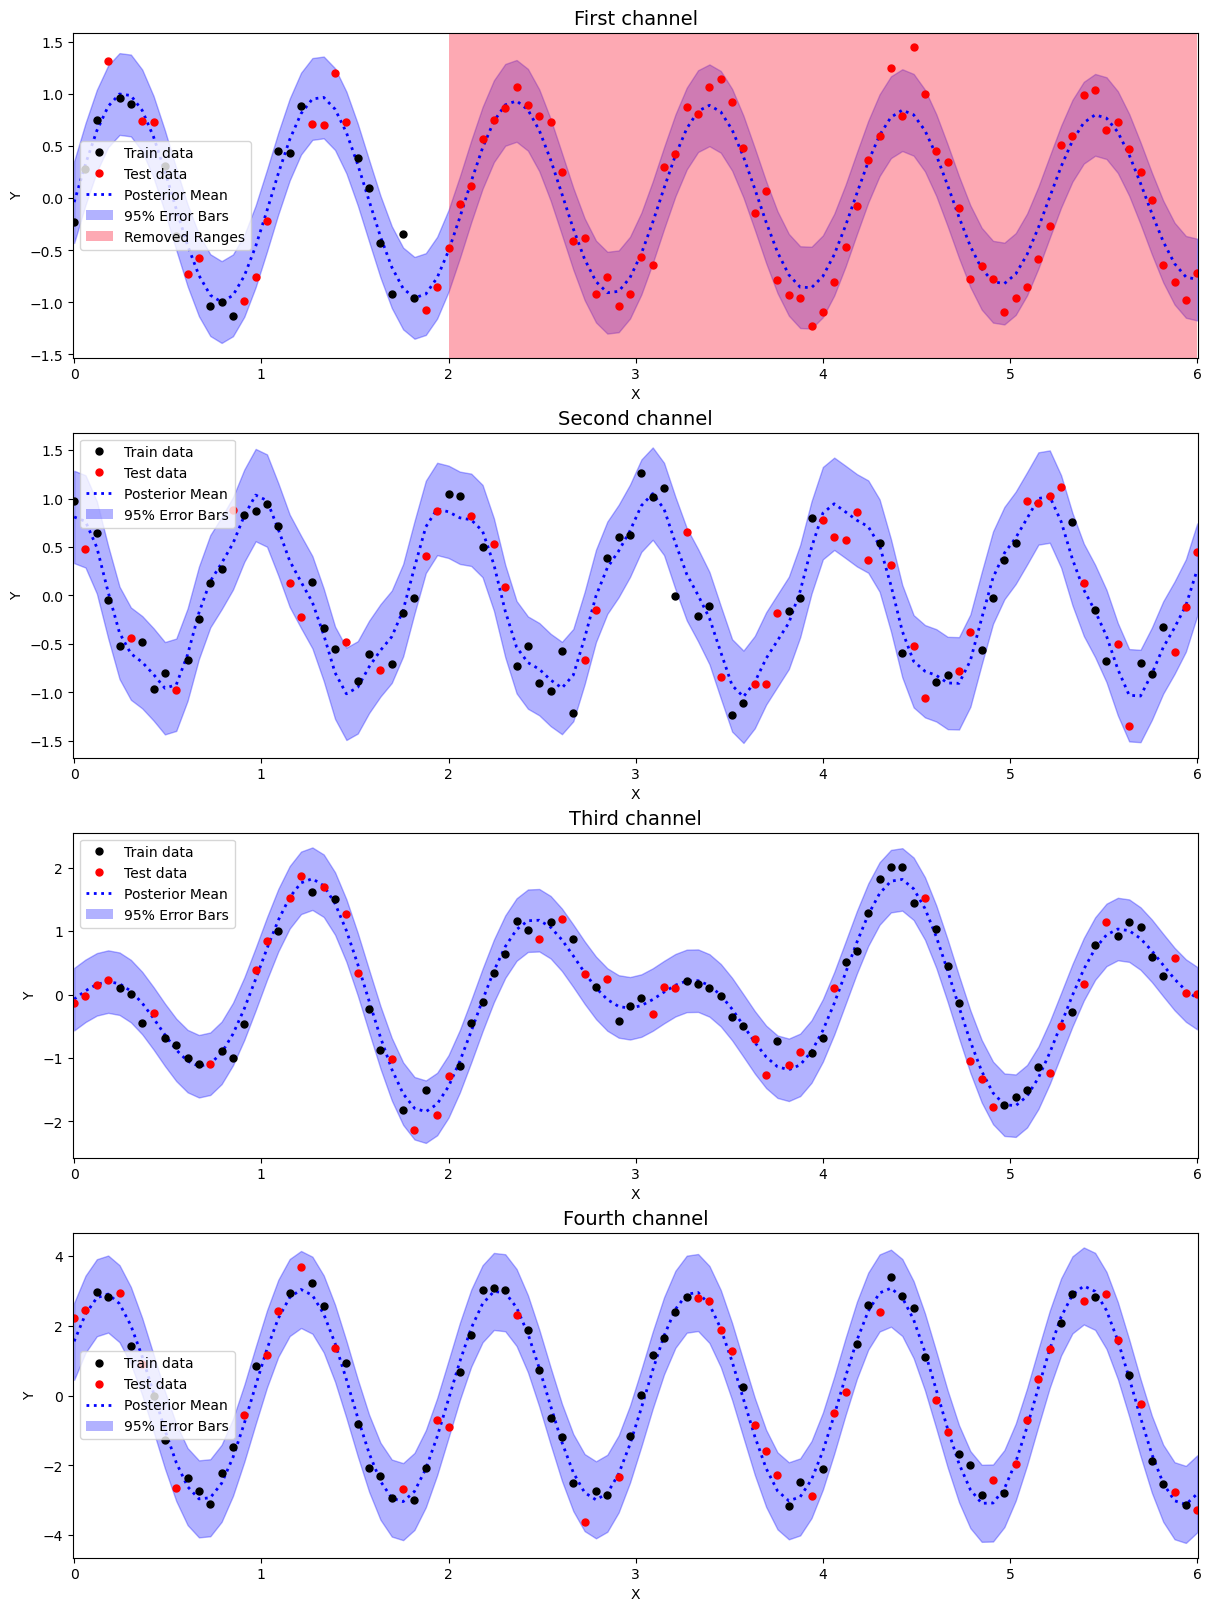

In [14]:
model.plot_prediction();


In [15]:
# we use the same time for all the channels
t_pred = np.linspace(6.0, 10.0, 100)
x_pred = [t_pred for i in range(len(dataset))]
dataset.set_prediction_data(x_pred)

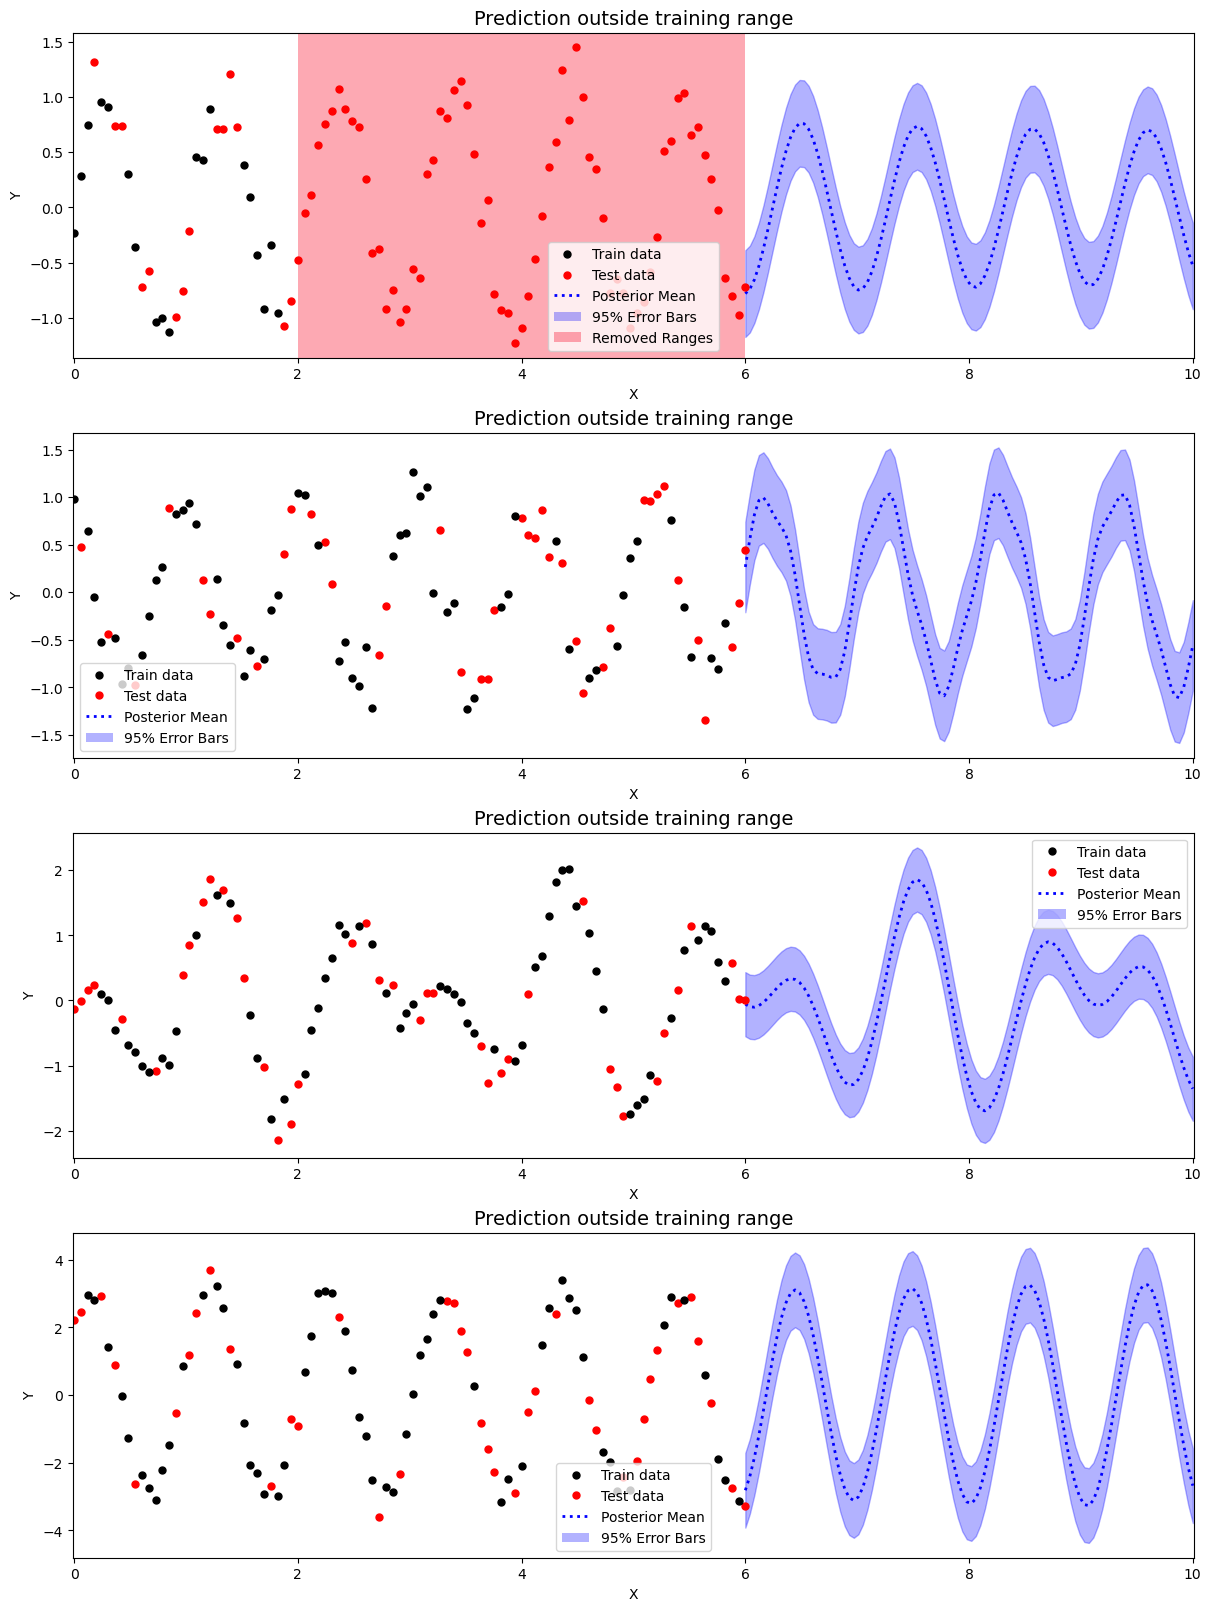

In [16]:
model.plot_prediction(title='Prediction outside training range');


# Multi Output GP